### Thuật toán phân lớp Bayes
### Naive Bayes Classification


Load các thư viện

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import math as mt
import operator
import matplotlib.pyplot as plt

In [2]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated


In [3]:
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers) / float(len(numbers))


In [4]:
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / float(len(numbers) - 1)
    return mt.sqrt(variance)


In [5]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del (summaries[-1])
    return summaries

In [6]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

In [7]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = mt.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (mt.sqrt(2 * mt.pi) * stdev)) * exponent

In [8]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2] / float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities


In [9]:
def predict_prob(summaries, X_test):
    y_predict = []
    for i in range(len(X_test)):
        probabilities = calculate_class_probabilities(summarize, X_test[i])
        y_predict.append(max(probabilities.items(), key=operator.itemgetter(1))[0])
    return y_predict

In [10]:
def acc_model(y_test, y_predict):
    count = 0
    for i in range(len(y_test)):
        if y_predict[i] == y_test[i]:
            count = count + 1
    return count / len(y_test)

Load data

 - Dữ liệu về phân loại bệnh tiểu đường, bao gồm 766 bản ghi, gồm 9 trường dữ liệu (kiểu int và float).
 - Ý nghĩa các trường dữ liệu: Số lần mang thai, Huyết áp, Độ dày, Insulin huyết thanh, Chỉ số khối cơ thể, Phả hệ, Tuổi.

In [11]:
df_data = pd.read_csv("pima-indians-diabetes.csv")
df_data.head(5)

,Number,Plasma glucose,Diastolic blood,Triceps skin,2-Hour serum,Body mass,Diabetes,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
attribute_names = list(df_data.columns)
print(attribute_names)

['Number', 'Plasma glucose', 'Diastolic blood', 'Triceps skin', '2-Hour serum', 'Body mass', 'Diabetes', 'Age', 'Class']


In [13]:
attribute_names.remove("Class")

data visualization

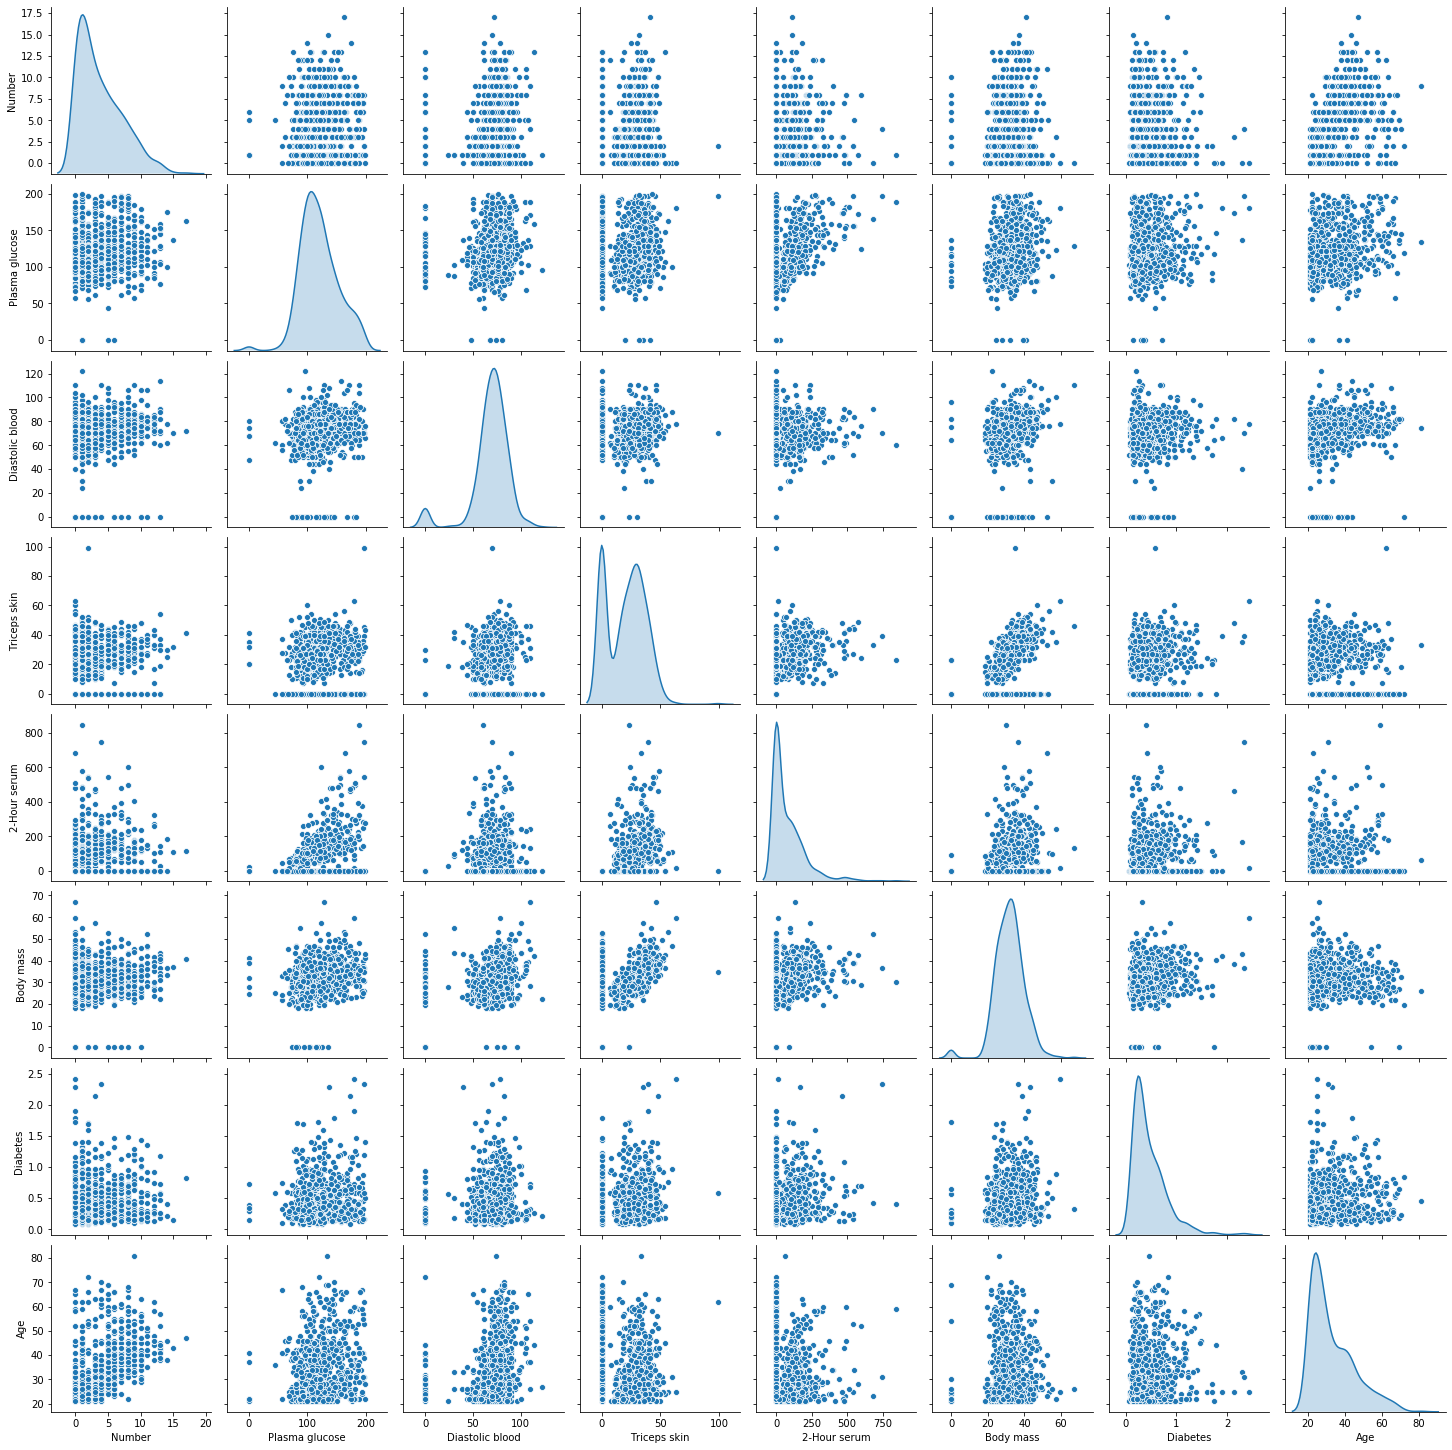

In [14]:
sns.pairplot(df_data[attribute_names], diag_kind="kde")

In [15]:
corrMatrix = df_data[attribute_names].corr()
print (corrMatrix)

                   Number  Plasma glucose  Diastolic blood  Triceps skin  \
Number           1.000000        0.129459         0.141282     -0.081672   
Plasma glucose   0.129459        1.000000         0.152590      0.057328   
Diastolic blood  0.141282        0.152590         1.000000      0.207371   
Triceps skin    -0.081672        0.057328         0.207371      1.000000   
2-Hour serum    -0.073535        0.331357         0.088933      0.436783   
Body mass        0.017683        0.221071         0.281805      0.392573   
Diabetes        -0.033523        0.137337         0.041265      0.183928   
Age              0.544341        0.263514         0.239528     -0.113970   

                 2-Hour serum  Body mass  Diabetes       Age  
Number              -0.073535   0.017683 -0.033523  0.544341  
Plasma glucose       0.331357   0.221071  0.137337  0.263514  
Diastolic blood      0.088933   0.281805  0.041265  0.239528  
Triceps skin         0.436783   0.392573  0.183928 -0.113970  


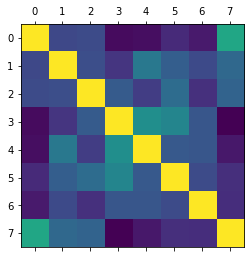

In [25]:
plt.matshow(corrMatrix)
plt.show()

Chia dữ liệu thành hai tập train và test tỉ lệ 8:2

In [16]:
train, test = train_test_split(df_data, test_size=0.2)
data_train = train.values
X_test = test[attribute_names].values
y_test = test["Class"].to_list()

Luyện mô hình và dự đoán

In [17]:
summarize = summarize_by_class(data_train)
y_predict = predict_prob(summarize, X_test)
print(y_predict)
print(y_test)
print("Accuracy is model:", acc_model(y_test, y_predict)*100, "%")

[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 

### 2.Triển khai thuật toán bằng python-sklearn


Cài đặt các thư viện

In [18]:
import math
import random
import pandas as pd

Đọc dữ liệu bằng pandas

In [19]:
data_df = pd.read_csv('pima-indians-diabetes.csv', header=0)
numpy_matrix = data_df[attribute_names].values
list_class = data_df["Class"].values
list_column = data_df.columns

In [20]:
data_df.head(5)
print(numpy_matrix.shape)
print(list_class.shape)

(768, 8)
(768,)


Chia dữ liệu train và test

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(numpy_matrix, list_class, test_size=0.2)

In [22]:
# training
model = GaussianNB() # sử dụng multinomial naive bayes
# tranning
model.fit(X_train, y_train)
# test
y_predict = model.predict(X_test)
print(y_test)
print(y_predict)
print(100*accuracy_score(y_predict, y_test),"%")

[1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0]
[1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 0]
77.92207792207793 %


source:

https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe

https://www.edureka.co/blog/naive-bayes-tutorial/